# Predicting Car Prices

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
        'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
        'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
        'price']
cars = pd.read_csv('imports-85.data', names = cols, na_values = '?')
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [3]:
cars.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [4]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
good_data = cars[continuous_values_cols]
good_data

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [5]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-rate   205 non-null    float64
 10  horsepower         203 non-null    float64
 11  peak-rpm           203 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              201 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 24.1 KB


In [6]:
good_data.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
unknown = good_data[good_data['price'].isnull()]
unknown.isnull().sum()

normalized-losses    4
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [8]:
good_data = good_data.dropna(subset = ['price'])
good_data = good_data.fillna(good_data.mean())
unknown['normalized-losses'] = good_data['normalized-losses'].mean()
unknown

<ipython-input-8-de9d242722ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown['normalized-losses'] = good_data['normalized-losses'].mean()


,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,122.0,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,122.0,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,122.0,94.5,155.9,63.6,52.0,1909,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,122.0,98.4,175.7,72.3,50.5,3366,203,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [9]:
prices = good_data['price']
cars = good_data
cars = (cars - cars.min()) / (cars.max() - cars.min())
cars['price'] = prices
cars

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.157068,0.655977,0.711940,0.735043,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.308411,0.510204,0.277778,0.315789,16845.0
201,0.157068,0.655977,0.711940,0.726496,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.523364,0.469388,0.166667,0.236842,19045.0
202,0.157068,0.655977,0.711940,0.735043,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.401869,0.551020,0.138889,0.184211,21485.0
203,0.157068,0.655977,0.711940,0.735043,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.271028,0.265306,0.361111,0.289474,22470.0


## Training Model
### Univariate Model

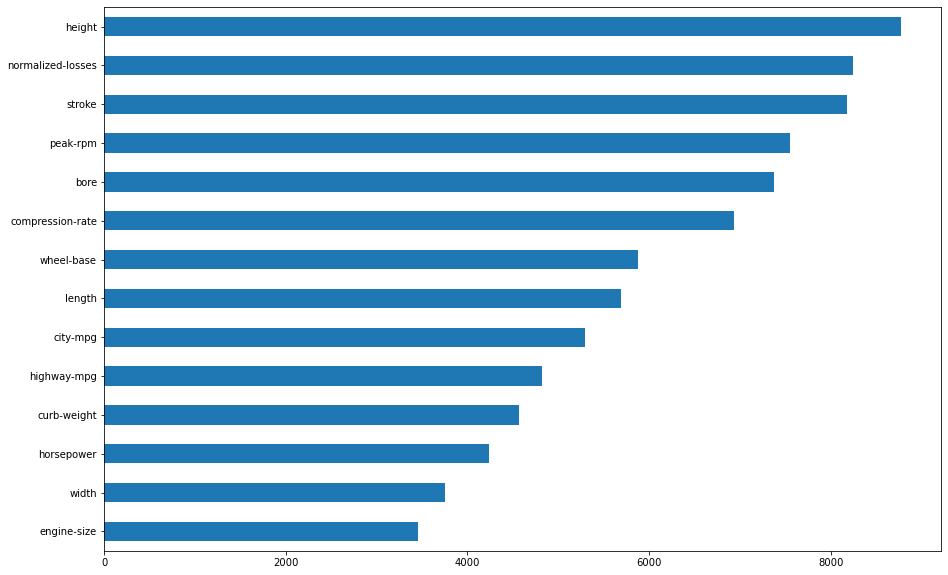

In [10]:
def knn_train_test(features, target, df):
    knn = KNeighborsRegressor(algorithm = 'brute')
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    training_set = rand_df.iloc[:len(df)//2]
    testing_set = rand_df.iloc[len(df)//2:]
    
    knn.fit(training_set[[features]], training_set[target])
    predicted_values = knn.predict(testing_set[[features]])
    
    mse = mean_squared_error(testing_set[target], predicted_values)
    rmse = np.sqrt(mse)
    return rmse

rmses = {}
features = cars.columns.drop('price')
target = 'price'

for col in features:
    rmse = knn_train_test(col, 'price', cars)
    rmses[col] = rmse
    
rmses_series = pd.Series(rmses)
sorted_ = rmses_series.sort_values()

sorted_.plot.barh(figsize = (15,10))
plt.show()

In [11]:
def knn_train_test(features, target, df):
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    training_set = rand_df.iloc[:len(df)//2]
    testing_set = rand_df.iloc[len(df)//2:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(training_set[[features]], training_set[target])
        predicted_values = knn.predict(testing_set[[features]])
        
        mse = mean_squared_error(testing_set[target], predicted_values)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
        
    return k_rmses

k_rmses_results = {}

features = cars.columns.drop('price')
target = 'price'

for col in features:
    k_rmses = knn_train_test(col, 'price', cars)
    k_rmses_results[col] = k_rmses
    
k_rmses_results

{'normalized-losses': {1: 8825.146752208702,
  3: 8154.735069915273,
  5: 7850.332326874846,
  7: 7870.738332659279,
  9: 7648.985893837922},
 'wheel-base': {1: 3568.6642244031104,
  3: 5846.119963263027,
  5: 5657.173425548546,
  7: 5702.897791938589,
  9: 5824.604077736826},
 'length': {1: 6620.5008649625815,
  3: 6378.593062035319,
  5: 5415.12490100324,
  7: 5109.693920560258,
  9: 4902.117708811933},
 'width': {1: 4478.702729431131,
  3: 4594.010750126433,
  5: 4834.961571227586,
  7: 5113.022178826526,
  9: 5435.261229412262},
 'height': {1: 7624.892674459733,
  3: 7174.708173364076,
  5: 7167.4712022891,
  7: 6943.721048442656,
  9: 7062.148659840041},
 'curb-weight': {1: 4528.991897095908,
  3: 4220.884546553664,
  5: 4109.349919342956,
  7: 4019.8444871096144,
  9: 4146.676617801234},
 'engine-size': {1: 3927.4317282669626,
  3: 3961.4834646788677,
  5: 4267.411325312565,
  7: 4122.431968071769,
  9: 4232.039926962581},
 'bore': {1: 10882.580710966176,
  3: 6953.039294448365,


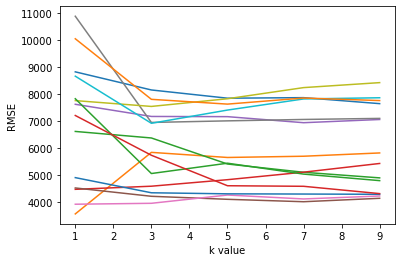

In [12]:
%matplotlib inline

for k, v in k_rmses_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
plt.show()

### Multivariate Model

In [13]:
feature_avg_rmse = {}

for k,v in k_rmses_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
    
avg_rmse_series = pd.Series(feature_avg_rmse)
sorted_ = avg_rmse_series.sort_values()
sorted_

engine-size          4102.159683
curb-weight          4205.149494
horsepower           4434.573958
width                4891.191692
highway-mpg          5294.324525
wheel-base           5319.891897
city-mpg             5636.043197
length               5685.206091
height               7194.588352
compression-rate     7737.444441
bore                 7802.790526
stroke               7961.070952
normalized-losses    8069.987675
peak-rpm             8221.652499
dtype: float64

In [14]:
sorted_features = list(sorted_.index)

In [15]:
def knn_train_test(train_cols, target_col, df):
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    train_df = rand_df.iloc[0:len(rand_df) // 2]
    test_df = rand_df.iloc[len(rand_df) // 2:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        predicted_labels = knn.predict(test_df[train_cols])

        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for i in range(2,7):
    k_rmse_results['{} best features'.format(i)] = knn_train_test(
        sorted_features[:i],
        'price',
        cars
    )

k_rmse_results

{'2 best features': {5: 5109.264933393449},
 '3 best features': {5: 5126.879666237468},
 '4 best features': {5: 2843.3868814538346},
 '5 best features': {5: 4355.316610377903},
 '6 best features': {5: 4054.748209149855}}

## Hyperparameter Tuning

In [16]:
def knn_train_test(train_cols, target_col, df):
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    train_df = rand_df.iloc[0:len(rand_df) // 2]
    test_df = rand_df.iloc[len(rand_df) // 2:]
    
    k_values = [i for i in range(1, 26)]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        predicted_labels = knn.predict(test_df[train_cols])

        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for i in range(2,7):
    k_rmse_results['{} best features'.format(i)] = knn_train_test(
        sorted_features[:i],
        'price',
        cars
    )

k_rmse_results

{'2 best features': {1: 3174.1163937682118,
  2: 2627.0257638366215,
  3: 2783.6557818004644,
  4: 2735.5464633177585,
  5: 2689.276848434306,
  6: 2660.0587376783224,
  7: 2732.205162263022,
  8: 2794.3611689458426,
  9: 2895.3604571578376,
  10: 2971.013040668415,
  11: 2941.5173027514315,
  12: 3082.910791904111,
  13: 3194.2067145808937,
  14: 3178.0288282166916,
  15: 3174.461691853802,
  16: 3174.887319087098,
  17: 3176.5166074720355,
  18: 3298.6144490145816,
  19: 3289.754914815115,
  20: 3328.4401963968194,
  21: 3342.975515002912,
  22: 3382.6972320535483,
  23: 3471.7741387128376,
  24: 3521.8370469469787,
  25: 3535.6999523205586},
 '3 best features': {1: 3577.7110125202835,
  2: 3685.1125081901914,
  3: 3509.913326088789,
  4: 3449.35199386769,
  5: 3776.847067631575,
  6: 3984.0466301086494,
  7: 3989.8195705186968,
  8: 3990.2732185404902,
  9: 4098.97270781125,
  10: 4165.138621610056,
  11: 4282.543463295514,
  12: 4387.949978069315,
  13: 4369.924585183612,
  14: 443

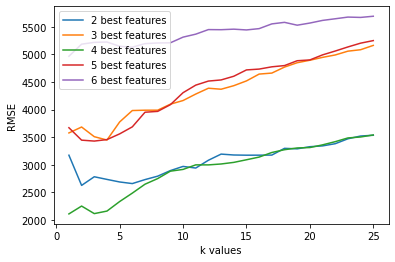

In [17]:
for k, v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y, label = '{}'.format(k))
    
plt.xlabel('k values')
plt.ylabel('RMSE')
plt.legend()
plt.show()

## Optimal Model
Seems like taking **k = 3** & considering **four best features** for building the models giving us least error.

In [20]:
features = sorted_features[:4]
k = 3

def predict_car_price(df):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(cars[features], cars['price'])
    df['predicted_price'] = knn.predict(df[features])
    return df

Predicting the prices for the missing values in price column for original data set

In [23]:
predict_car_price(unknown)

<ipython-input-20-6883da43d0c5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted_price'] = knn.predict(df[features])


,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price,predicted_price
9,122.0,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160.0,5500.0,16,22,NaN,34600.0
44,122.0,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN,34600.0
45,122.0,94.5,155.9,63.6,52.0,1909,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN,34600.0
129,122.0,98.4,175.7,72.3,50.5,3366,203,3.94,3.11,10.0,288.0,5750.0,17,28,NaN,34600.0
